# Requirement:

Describe the latest bilateral trade data for the G7 (this aggregate can be computed using bilateral imports and exports data available on the IMF Direction of Trade Statistics) with the three network graphical representations in the module on network visualisation.

Upload the data used for the work in csv format in the GitHub repository.

Describe in the README.md file the measure used for aggregating bilateral imports and exports. Be careful with the definition of the data downloaded from the IMF DTS.

In [15]:
# initial set up

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-v0_8-colorblind')
%matplotlib inline


In [16]:
import os
import numpy as np
import pandas as pd

# Set working directory
os.chdir(r"C:/Users/tsuji/Dropbox/study/UoL/ST2195 Programming for Data Science/lecture8/st2195_assignment_8")

# Read CSV file 
dataset = pd.read_csv("IMTS_export_dataset.csv")
dataset = dataset[dataset["INDICATOR"]=="Exports of goods, Free on board (FOB), US dollar"]
# Check NaN
print(dataset.isna().sum())

DATASET                0
SERIES_CODE            0
OBS_MEASURE            0
COUNTRY                0
INDICATOR              0
COUNTERPART_COUNTRY    0
FREQUENCY              0
SCALE                  0
2020                   1
2021                   1
2022                   1
2023                   1
2024                   1
dtype: int64


In [21]:
# filter out NaN
dataset = dataset.dropna(subset=["2024"])
# Check NaN
print(dataset.isna().sum())

DATASET                0
SERIES_CODE            0
OBS_MEASURE            0
COUNTRY                0
INDICATOR              0
COUNTERPART_COUNTRY    0
FREQUENCY              0
SCALE                  0
2020                   0
2021                   0
2022                   0
2023                   0
2024                   0
dtype: int64


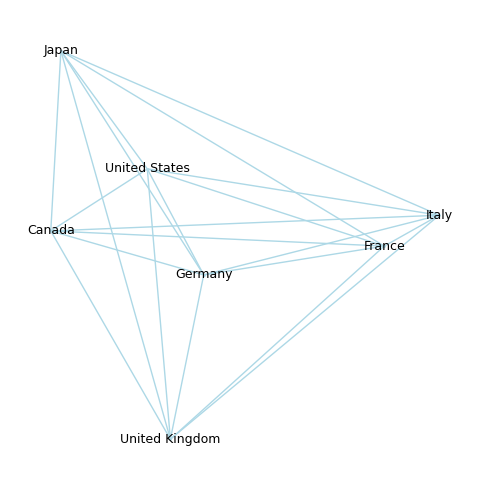

In [25]:
G = nx.Graph()

for index, row in dataset.iterrows():
    G.add_edge(row['COUNTRY'], row['COUNTERPART_COUNTRY'], weight=row['2024'])

# remove isolated vertices (if any)    
remove = [node for node,degree in G.degree() if degree ==0]
G.remove_nodes_from(remove)

#Setting size and colours
options = {'node_color': 'lightblue', 'edge_color': 'lightblue', 'node_size': 1, 'width': 1, 'alpha': 1.0,}

# Producing the network
plt.subplots(figsize=(5,5))
pos=nx.spring_layout(G) # Force-directed layout: It arranges nodes so that connected nodes are closer together (Countries with large mutual trade exports are closer together in the graph) 
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

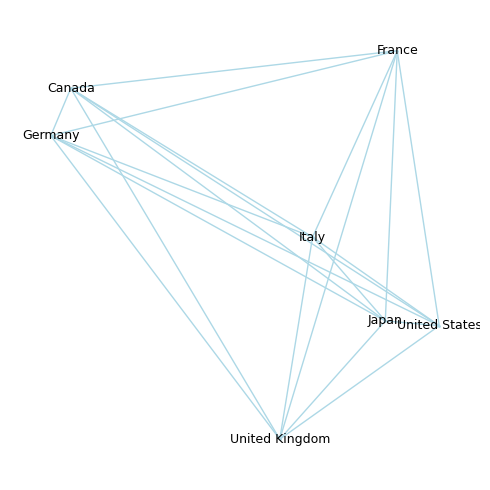

In [26]:
plt.subplots(figsize=(5,5))
pos=nx.random_layout(G) # Random layout assigns each node a random position in the plotting area.
nx.draw(G,pos=pos,font_size=9,**options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

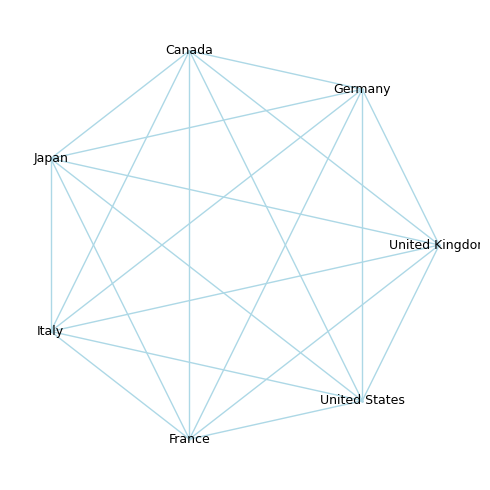

In [28]:
plt.subplots(figsize=(5, 5))
pos = nx.circular_layout(G) # Circular layout
nx.draw(G, pos=pos, font_size=9, **options)
nx.draw_networkx_labels(G, pos=pos, font_size=9)
plt.tight_layout()
plt.axis('off')
plt.show()